# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin went to $58,000 the last time this price action happened. It’s back.  Bitcoin closes seven consecutive daily green candles, putting it on track for the longest winning streak in 2021. The post Bitcoin went to $58,000 the last time this price action happened. It&#8217;s back appeared first on CryptoSlate. ... [| Skaityti daugiau](https://cryptoslate.com/fear-goes-out-the-window-as-bitcoin-finishes-longest-green-streak-in-2021/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Rising cases in Alberta, Team Canada medals, fertility doctor settlement.  July 28, 2021 | Concern in Alberta but not panic as the province sees a rise in COVID-19 cases. Team Canada's women rising to the occasion at Tokyo 2020. Plus, a fertility doctor at the centre of a controversial lawsuit agrees to a multi-million dollar settle… ... [| Skaityti daugiau](http://www.cbc.ca/player/play/1866224707562) 

### Kainų kaita pandemijos metu

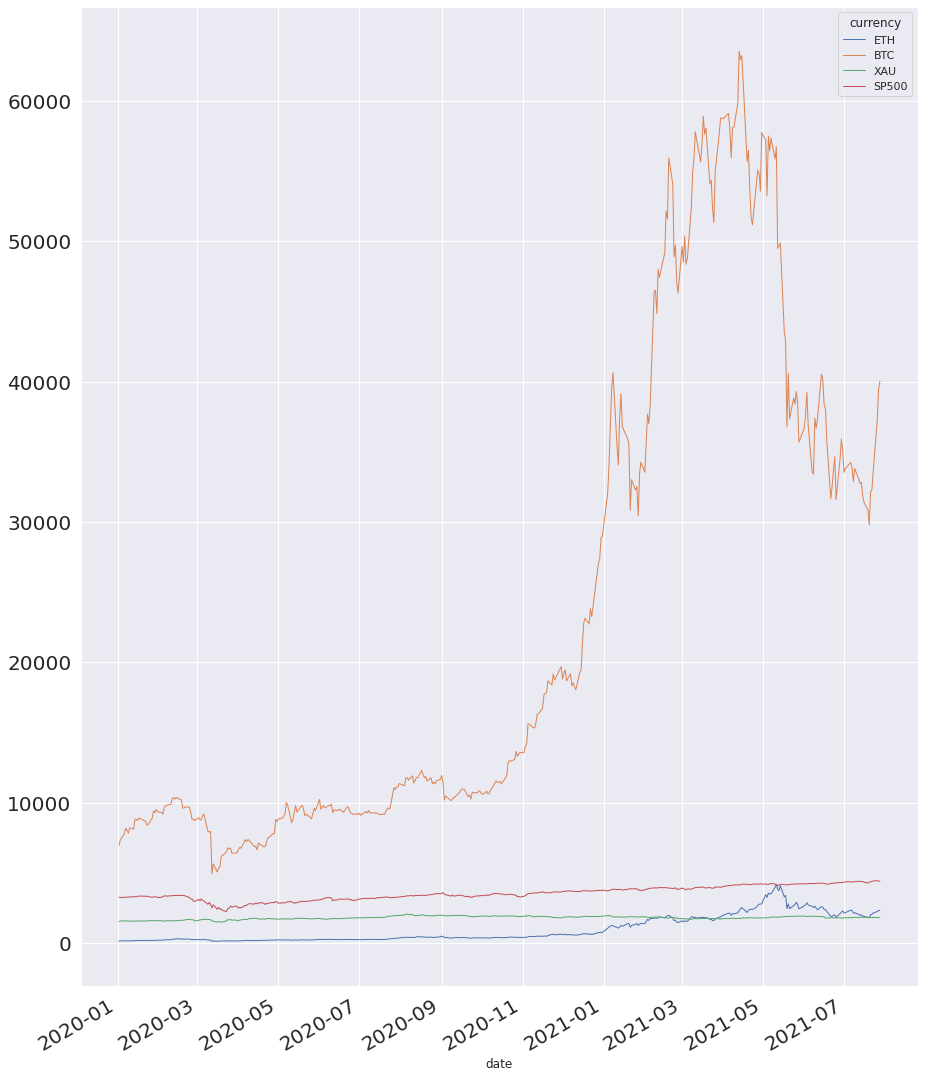

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.889396,0.208812,0.857067
BTC,0.889396,1.000000,0.142603,0.819724
XAU,0.208812,0.142603,1.000000,0.384525
SP500,0.857067,0.819724,0.384525,1.000000


In [8]:
#hide ### Koreliacijos matrica.

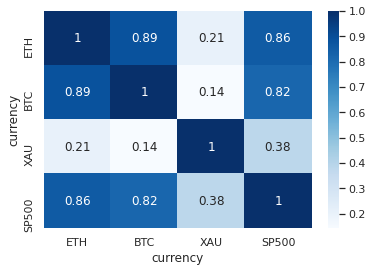

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')